Check Python version

In [1]:
!python --version

Python 3.9.16


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [3]:
# Local directory
# data_dir = "../datasets/retail"
# file_name = "air_passengers"
# file_path = f"{data_dir}/{file_name}.csv"

# Through online GitHub
file_path = "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv"

In [4]:
train_df = pd.read_csv(file_path)

In [5]:
train_df.shape

(144, 2)

In [6]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [7]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [9]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [10]:
train_df[target_col] = train_df[target_col].astype(float)

In [11]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

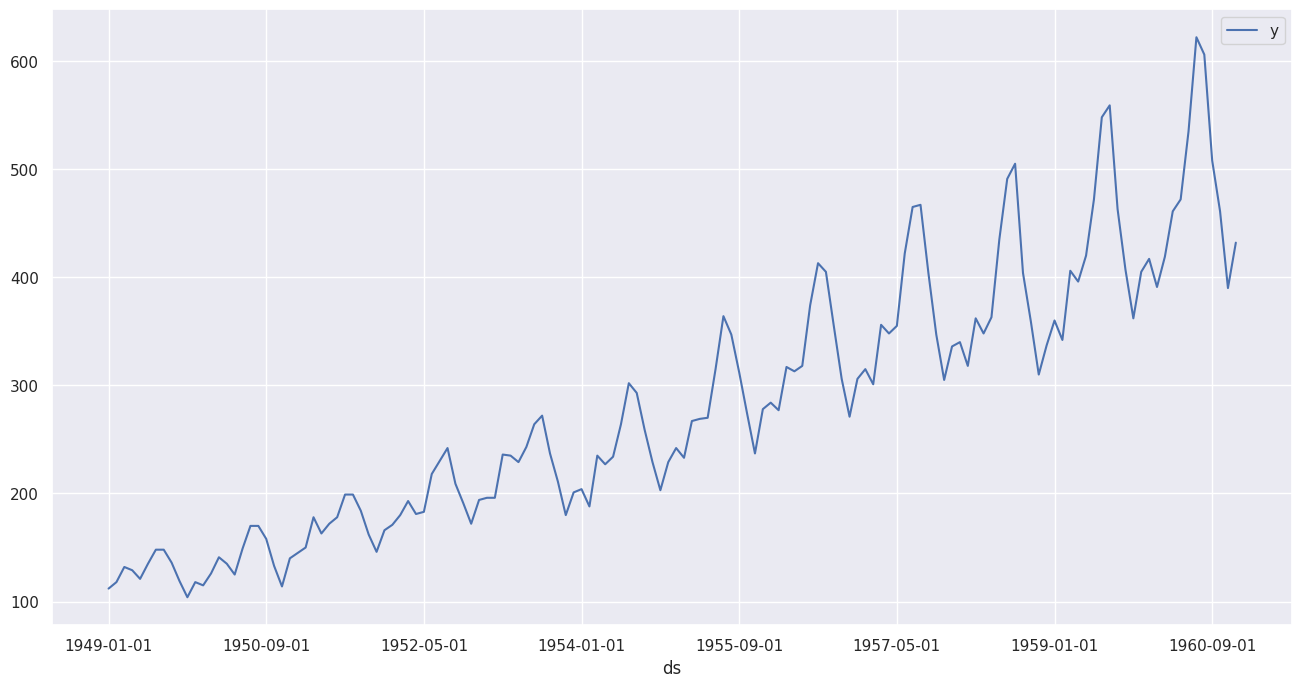

In [12]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [13]:
train_data = []

In [14]:
for value in train_df.values:
    train_data.append(list(value))

In [15]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [16]:
# Default model request
model_request = {
    'type': 'meta_lr',
    'score': ['smape', 'mape'],
    'params': {
        'preprocessors': [
            {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            {'type': 'darts_autoets'},
            {'type': 'darts_autoarima'},
            {'type': 'darts_autotheta'},
            {'type': 'stats_autotheta'},
        ],
    },
}

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'score': ['smape', 'mape'],
#     'param': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }

Train API JSON Payload

In [17]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [18]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [19]:
# URL to our SYBIL AWS service
protocol = url_dict["protocol"]
host = url_dict["host"]
port = url_dict["port"]
endpoint = "train"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [20]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 5.42 ms, sys: 690 µs, total: 6.11 ms
Wall time: 3.3 s


In [21]:
print(response)
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

<Response [500]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
train_json_out

{'model': 'AgEBCIHeAACA3gAAX5QAABgAAABalAAAhREAAD+AAC5wlGmUYXJhbG+MSZOMZ25fjGEHeJOMjIyMdWUubR9wTWyUc3OBlJROKUtOGHRylHOMbW9udBRydCl0X4x0ZR9lk4xkbZR5YZRygV99YXJiZGKUZJSUeW6MSUGTKJRzbh9hlERJaHR4BHBsYXBjcmVhcnNtdHJcjIyTiIz//24BjB9jdIxzlHIAlIWUS///bgGJFqdL3B6v8YITVeYouUrufx/BUpQltviJy1ztkSJk9TfIWZssbv+QgxRW5ym6S40eYB/xgia3+YrMXe4wwQOUJclanC1vAJHTZKY3yGz9P9ASox80dgdJ2mte7zHCBJUmaPk7zF0BktRlpzjJC5zebwCkNR93CErbbK4/gRKjR9gaq+1+D1HiJLVGOcoMnd9wAUPUFh+UcmJoBmhflGSGcENoaChkLi5fZQWUaIcBOChO/2JhdR9gh2RLYpRfjGWMLmRQZJRuU2iHaIeQBKgsxUl+Aje7Px91+S6yNs5SiAxBxUl/Azi8QNhckhZLz1OIDELGSjG16h9uoyer4WWaHqI6vvR4rTG162+kKKxEyP6Ctzu/9HiuMh+2TtIHi8FFyf6CuDzApipg5BmdIVfbEJQYsDRq7iOnKx9g5BqeIro+dPctsTVq7iSoLMRIfQE3uz90+C6yNhyg1h9ajxOXzVGGlG5ic3NolIyUc5SUlHKUi5R9bpSFoYtolBBtYWhhgWhtSJRLh5RL//+AAOCGAB9odHaUYWiGbZRzbZRfchR2bxhfb3NhcnJmb19OeHNpFQthcox0X3R1dXKMZHSACh90coxhDXALaXJjKG5ObpQAZGFhaWRvU2FylGlfYQBhEh9oZ3V1dGN2lHNvc2VlYWx0YWx1coxllHNuaGxwS5SGdQJjlHKgCh9hc05yZnVhYWxvgQBabWEBZQZHrUCMjJQ6hmNAZejbjB9B7ZRpdHMHlEtSl

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [ ]:
dates = [
    "1961-01-01", "1961-02-01", "1961-03-01", "1961-04-01", "1961-05-01", "1961-06-01",
    "1961-07-01", "1961-08-01", "1961-09-01", "1961-10-01", "1961-11-01", "1961-12-01",
    "1962-01-01", "1962-02-01", "1962-03-01", "1962-04-01", "1962-05-01", "1962-06-01",
    "1962-07-01", "1962-08-01", "1962-09-01", "1962-10-01", "1962-11-01", "1962-12-01",
]

Model from Train API

In [ ]:
model = train_json_out["model"]

Forecast API JSON Payload

In [ ]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [ ]:
endpoint = "forecast"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [ ]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 4.76 ms, sys: 484 µs, total: 5.24 ms
Wall time: 22.9 ms


In [ ]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [ ]:
forecast_json_out

{'data': [['1960-12-31T00:00:00', 425.2916913999631],
  ['1961-01-30T00:00:00', 404.1491283264498],
  ['1961-03-01T00:00:00', 451.3884212636669],
  ['1961-03-31T00:00:00', 477.22245640809757],
  ['1961-04-30T00:00:00', 490.7228682301231],
  ['1961-05-30T00:00:00', 572.8366100538874],
  ['1961-06-29T00:00:00', 658.3792891573128],
  ['1961-07-29T00:00:00', 650.7687066193653],
  ['1961-08-28T00:00:00', 548.2273670806114],
  ['1961-09-27T00:00:00', 482.4789003386309],
  ['1961-10-27T00:00:00', 404.1712912758906],
  ['1961-11-26T00:00:00', 462.1944999343992],
  ['1961-12-26T00:00:00', 475.6760771082592],
  ['1962-01-25T00:00:00', 453.62809378112223],
  ['1962-02-24T00:00:00', 505.0783532603038],
  ['1962-03-26T00:00:00', 529.8417382411333],
  ['1962-04-25T00:00:00', 543.5283326586891],
  ['1962-05-25T00:00:00', 630.1135911811225],
  ['1962-06-24T00:00:00', 719.528226816492],
  ['1962-07-24T00:00:00', 711.6914825751599],
  ['1962-08-23T00:00:00', 603.7249855181024],
  ['1962-09-22T00:00:00',

Combine forecast dates and output

In [ ]:
forecast_df = pd.DataFrame(
    data=forecast_json_out["data"],
    columns=[time_col, target_col],
)

In [ ]:
forecast_df.shape

(24, 2)

In [ ]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,425.291691
1,1961-01-30T00:00:00,404.149128
2,1961-03-01T00:00:00,451.388421
3,1961-03-31T00:00:00,477.222456
4,1961-04-30T00:00:00,490.722868


In [ ]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,711.691483
20,1962-08-23T00:00:00,603.724986
21,1962-09-22T00:00:00,533.255271
22,1962-10-22T00:00:00,450.844267
23,1962-11-21T00:00:00,512.190425


Plot train and forecast side-by-side

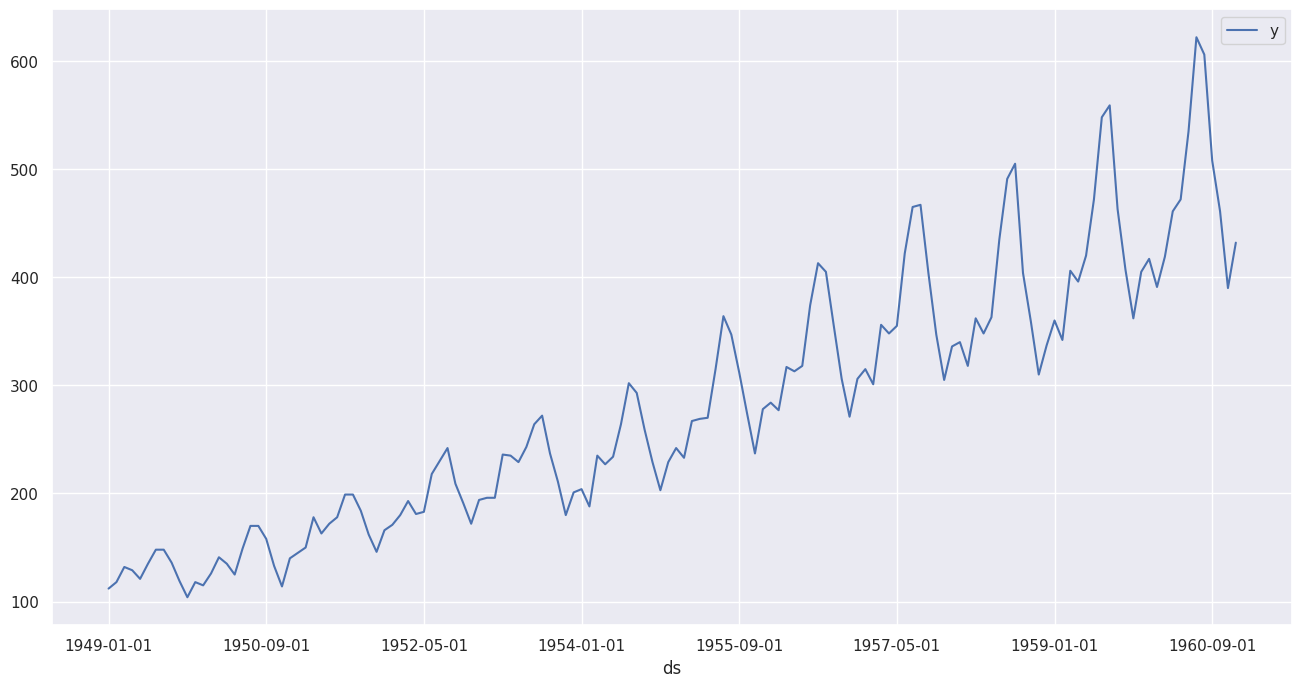

In [ ]:
train_df["color"] = "b"
train_df.set_index("ds").plot(figsize=figsize, color=train_df["color"]);

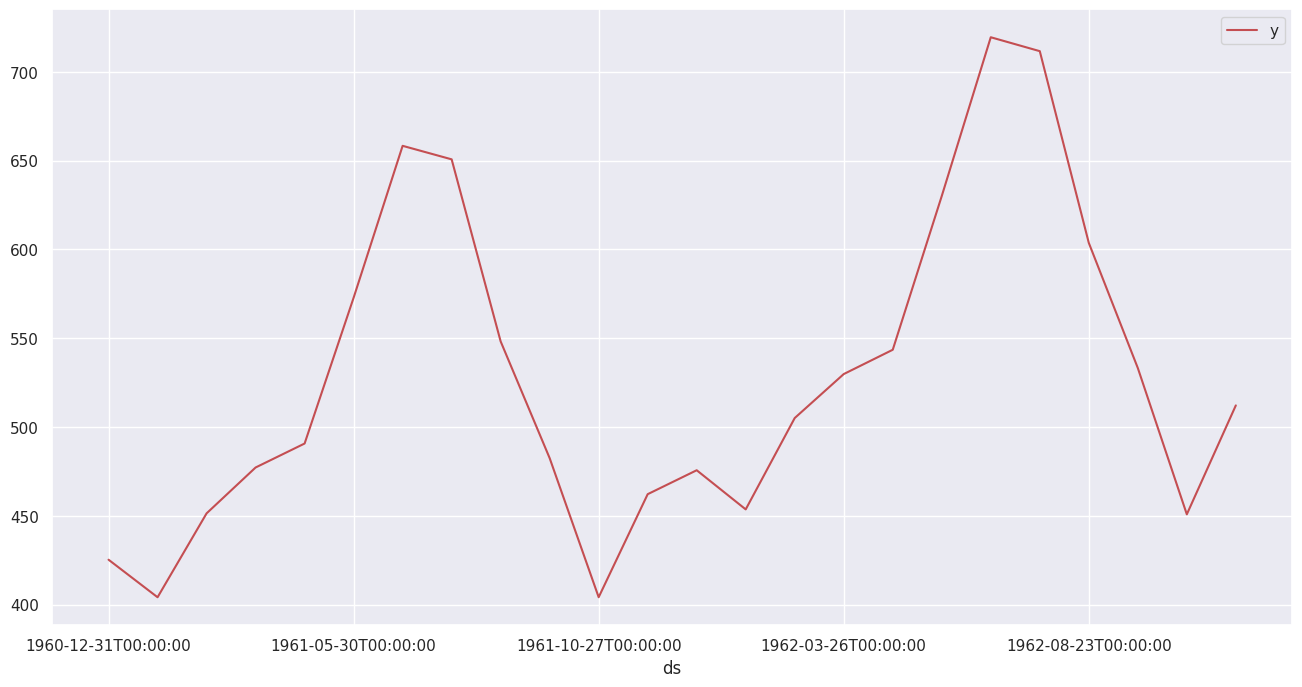

In [ ]:
forecast_df["color"] = "r"
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df["color"]);

Combine train and test sets

In [ ]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [ ]:
df.shape

(168, 3)

In [ ]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [ ]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,711.691483,r
164,1962-08-23T00:00:00,603.724986,r
165,1962-09-22T00:00:00,533.255271,r
166,1962-10-22T00:00:00,450.844267,r
167,1962-11-21T00:00:00,512.190425,r


Plot combined train and test sets with the vertical black line as the cut-off

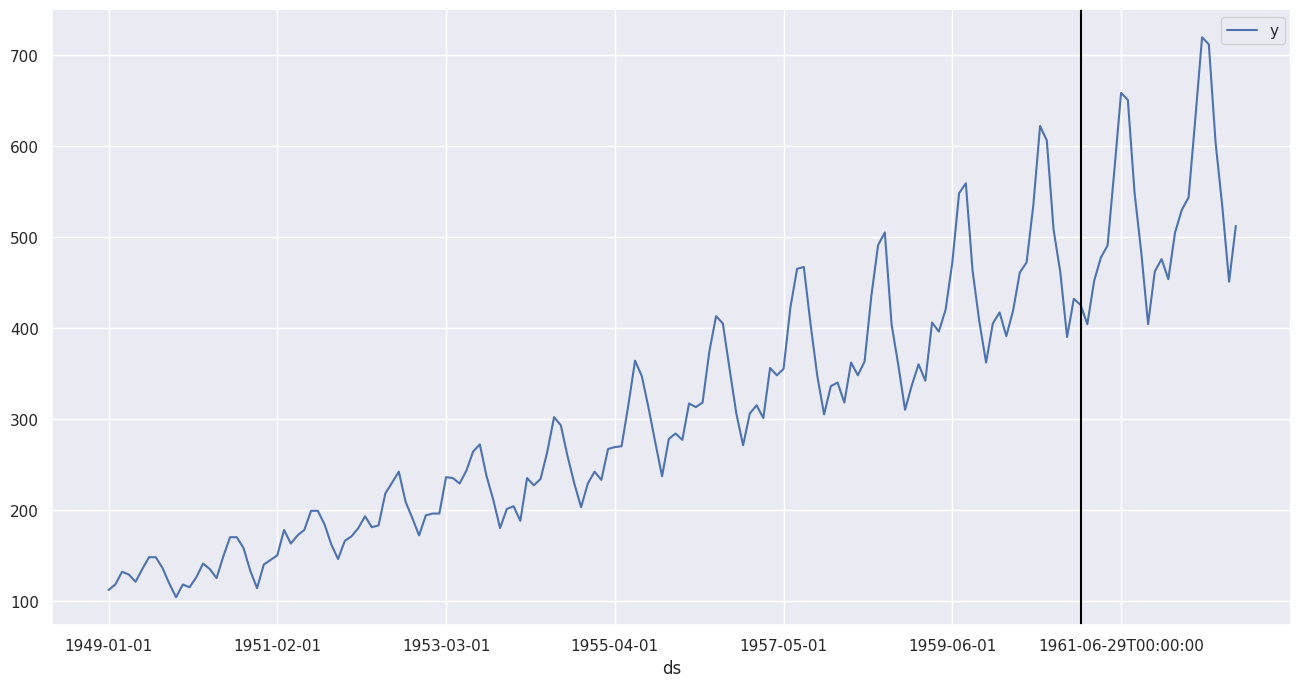

In [ ]:
df.set_index(time_col).plot(figsize=figsize, color=df["color"])
plt.axvline(x=len(train_df), color='black', label ='Train/Test set cut-off')
plt.show();